# Import Library and Dataset

#### Import Library

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# for all NLP related operations on text

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [30]:
# To identify the sentiment of text

from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

#### Import Dataset

In [3]:
data = pd.read_csv("Twitter24.csv")
data.head()

,Text,Label1,Label2
0,RT @ChusnulCh__ Disaat buzzer Anies ga ada hen...,1,1
1,RT @keuangannews_id Marwan Batubara: Jangan-ja...,0,2
2,RT @terbucinz DUA TOKOH INI SALING MELENGKAPI ...,3,1
3,RT @keuangannews_id Marwan Batubara: Jangan-ja...,0,2
4,RT @ChusnulCh__ Disaat buzzer Anies ga ada hen...,1,1


# Text Preprocessing

## Data Cleansing

#### Remove Username

In [4]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text

In [5]:
# Save cleaned text in a new column called 'Clean_Text'

data['Clean_Text'] = np.vectorize(remove_pattern)(data['Text'], " *RT* | *@[\w]*")

data.head()

,Text,Label1,Label2,Clean_Text
0,RT @ChusnulCh__ Disaat buzzer Anies ga ada hen...,1,1,Disaat buzzer Anies ga ada hentinya sebar hoa...
1,RT @keuangannews_id Marwan Batubara: Jangan-ja...,0,2,Marwan Batubara: Jangan-jangan Pemenang Pilpr...
2,RT @terbucinz DUA TOKOH INI SALING MELENGKAPI ...,3,1,DUA TOKOH INI SALING MELENGKAPI DAN SANGAT ID...
3,RT @keuangannews_id Marwan Batubara: Jangan-ja...,0,2,Marwan Batubara: Jangan-jangan Pemenang Pilpr...
4,RT @ChusnulCh__ Disaat buzzer Anies ga ada hen...,1,1,Disaat buzzer Anies ga ada hentinya sebar hoa...


#### Remove Links

In [6]:
cleaned_text = []

for index, row in data.iterrows():
    
    # Filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Text.split() if 'http' not in word]
    cleaned_text.append(' '.join(words_without_links))

data['Clean_Text'] = cleaned_text
data.head()

,Text,Label1,Label2,Clean_Text
0,RT @ChusnulCh__ Disaat buzzer Anies ga ada hen...,1,1,Disaat buzzer Anies ga ada hentinya sebar hoax...
1,RT @keuangannews_id Marwan Batubara: Jangan-ja...,0,2,Marwan Batubara: Jangan-jangan Pemenang Pilpre...
2,RT @terbucinz DUA TOKOH INI SALING MELENGKAPI ...,3,1,DUA TOKOH INI SALING MELENGKAPI DAN SANGAT IDE...
3,RT @keuangannews_id Marwan Batubara: Jangan-ja...,0,2,Marwan Batubara: Jangan-jangan Pemenang Pilpre...
4,RT @ChusnulCh__ Disaat buzzer Anies ga ada hen...,1,1,Disaat buzzer Anies ga ada hentinya sebar hoax...


#### Remove Punctuations, Numbers and Special Characters

In [7]:
# Save cleaned text in a new column called 'Final_Text'

data['Final_Text'] = data['Clean_Text'].str.replace("[^a-zA-Z# ]", "")
data.head()

C:\Users\TRISTAN RAMDHANI\AppData\Local\Temp\ipykernel_29968\911432807.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Final_Text'] = data['Clean_Text'].str.replace("[^a-zA-Z# ]", "")


,Text,Label1,Label2,Clean_Text,Final_Text
0,RT @ChusnulCh__ Disaat buzzer Anies ga ada hen...,1,1,Disaat buzzer Anies ga ada hentinya sebar hoax...,Disaat buzzer Anies ga ada hentinya sebar hoax...
1,RT @keuangannews_id Marwan Batubara: Jangan-ja...,0,2,Marwan Batubara: Jangan-jangan Pemenang Pilpre...,Marwan Batubara Janganjangan Pemenang Pilpres ...
2,RT @terbucinz DUA TOKOH INI SALING MELENGKAPI ...,3,1,DUA TOKOH INI SALING MELENGKAPI DAN SANGAT IDE...,DUA TOKOH INI SALING MELENGKAPI DAN SANGAT IDE...
3,RT @keuangannews_id Marwan Batubara: Jangan-ja...,0,2,Marwan Batubara: Jangan-jangan Pemenang Pilpre...,Marwan Batubara Janganjangan Pemenang Pilpres ...
4,RT @ChusnulCh__ Disaat buzzer Anies ga ada hen...,1,1,Disaat buzzer Anies ga ada hentinya sebar hoax...,Disaat buzzer Anies ga ada hentinya sebar hoax...


## Stopword

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\TRISTAN
[nltk_data]     RAMDHANI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')

In [10]:
data['Final_Text'] = data['Final_Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords.words())]))
data.head()

,Text,Label1,Label2,Clean_Text,Final_Text
0,RT @ChusnulCh__ Disaat buzzer Anies ga ada hen...,1,1,Disaat buzzer Anies ga ada hentinya sebar hoax...,Disaat buzzer Anies hentinya sebar hoax deklar...
1,RT @keuangannews_id Marwan Batubara: Jangan-ja...,0,2,Marwan Batubara: Jangan-jangan Pemenang Pilpre...,Marwan Batubara Janganjangan Pemenang Pilpres ...
2,RT @terbucinz DUA TOKOH INI SALING MELENGKAPI ...,3,1,DUA TOKOH INI SALING MELENGKAPI DAN SANGAT IDE...,DUA TOKOH INI SALING MELENGKAPI DAN SANGAT IDE...
3,RT @keuangannews_id Marwan Batubara: Jangan-ja...,0,2,Marwan Batubara: Jangan-jangan Pemenang Pilpre...,Marwan Batubara Janganjangan Pemenang Pilpres ...
4,RT @ChusnulCh__ Disaat buzzer Anies ga ada hen...,1,1,Disaat buzzer Anies ga ada hentinya sebar hoax...,Disaat buzzer Anies hentinya sebar hoax deklar...


In [11]:
data = data.dropna()
data.head()

,Text,Label1,Label2,Clean_Text,Final_Text
0,RT @ChusnulCh__ Disaat buzzer Anies ga ada hen...,1,1,Disaat buzzer Anies ga ada hentinya sebar hoax...,Disaat buzzer Anies hentinya sebar hoax deklar...
1,RT @keuangannews_id Marwan Batubara: Jangan-ja...,0,2,Marwan Batubara: Jangan-jangan Pemenang Pilpre...,Marwan Batubara Janganjangan Pemenang Pilpres ...
2,RT @terbucinz DUA TOKOH INI SALING MELENGKAPI ...,3,1,DUA TOKOH INI SALING MELENGKAPI DAN SANGAT IDE...,DUA TOKOH INI SALING MELENGKAPI DAN SANGAT IDE...
3,RT @keuangannews_id Marwan Batubara: Jangan-ja...,0,2,Marwan Batubara: Jangan-jangan Pemenang Pilpre...,Marwan Batubara Janganjangan Pemenang Pilpres ...
4,RT @ChusnulCh__ Disaat buzzer Anies ga ada hen...,1,1,Disaat buzzer Anies ga ada hentinya sebar hoax...,Disaat buzzer Anies hentinya sebar hoax deklar...


## Tokenizing

In [12]:
tokenized_text = data['Final_Text'].apply(lambda x: x.split())
tokenized_text.head()

0    [Disaat, buzzer, Anies, hentinya, sebar, hoax,...
1    [Marwan, Batubara, Janganjangan, Pemenang, Pil...
2    [DUA, TOKOH, INI, SALING, MELENGKAPI, DAN, SAN...
3    [Marwan, Batubara, Janganjangan, Pemenang, Pil...
4    [Disaat, buzzer, Anies, hentinya, sebar, hoax,...
Name: Final_Text, dtype: object

## Convert words into Lemma

In [13]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\TRISTAN
[nltk_data]    |     RAMDHANI\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\TRISTAN
[nltk_data]    |     RAMDHANI\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\TRISTAN
[nltk_data]    |     RAMDHANI\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\TRISTAN
[nltk_data]    |     RAMDHANI\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars

[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to C:\Users\TRISTAN
[nltk_data]    |     RAMDHANI\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to C:\Users\TRISTAN
[nltk_data]    |     RAMDHANI\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to C:\Users\TRISTAN
[nltk_data]    |     RAMDHANI\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to C:\Users\TRISTAN
[nltk_data]    |     RAMDHANI\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\TRISTAN
[nltk_data]    |     RAMDHANI\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_p

[nltk_data]    |   Package switchboard is already up-to-date!
[nltk_data]    | Downloading package tagsets to C:\Users\TRISTAN
[nltk_data]    |     RAMDHANI\AppData\Roaming\nltk_data...
[nltk_data]    |   Package tagsets is already up-to-date!
[nltk_data]    | Downloading package timit to C:\Users\TRISTAN
[nltk_data]    |     RAMDHANI\AppData\Roaming\nltk_data...
[nltk_data]    |   Package timit is already up-to-date!
[nltk_data]    | Downloading package toolbox to C:\Users\TRISTAN
[nltk_data]    |     RAMDHANI\AppData\Roaming\nltk_data...
[nltk_data]    |   Package toolbox is already up-to-date!
[nltk_data]    | Downloading package treebank to C:\Users\TRISTAN
[nltk_data]    |     RAMDHANI\AppData\Roaming\nltk_data...
[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     C:\Users\TRISTAN
[nltk_data]    |     RAMDHANI\AppData\Roaming\nltk_data...
[nltk_data]    |   Package twitter_samples is already up-to

True

In [14]:
word_lemmatizer = WordNetLemmatizer()

tokenized_text = tokenized_text.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_text.head()

0    [Disaat, buzzer, Anies, hentinya, sebar, hoax,...
1    [Marwan, Batubara, Janganjangan, Pemenang, Pil...
2    [DUA, TOKOH, INI, SALING, MELENGKAPI, DAN, SAN...
3    [Marwan, Batubara, Janganjangan, Pemenang, Pil...
4    [Disaat, buzzer, Anies, hentinya, sebar, hoax,...
Name: Final_Text, dtype: object

## Join all tokens into sentences

In [15]:
for i, tokens in enumerate(tokenized_text):
    tokenized_text[i] = ' '.join(tokens)

data['Final_Text'] = tokenized_text
data.head()

,Text,Label1,Label2,Clean_Text,Final_Text
0,RT @ChusnulCh__ Disaat buzzer Anies ga ada hen...,1,1,Disaat buzzer Anies ga ada hentinya sebar hoax...,Disaat buzzer Anies hentinya sebar hoax deklar...
1,RT @keuangannews_id Marwan Batubara: Jangan-ja...,0,2,Marwan Batubara: Jangan-jangan Pemenang Pilpre...,Marwan Batubara Janganjangan Pemenang Pilpres ...
2,RT @terbucinz DUA TOKOH INI SALING MELENGKAPI ...,3,1,DUA TOKOH INI SALING MELENGKAPI DAN SANGAT IDE...,DUA TOKOH INI SALING MELENGKAPI DAN SANGAT IDE...
3,RT @keuangannews_id Marwan Batubara: Jangan-ja...,0,2,Marwan Batubara: Jangan-jangan Pemenang Pilpre...,Marwan Batubara Janganjangan Pemenang Pilpres ...
4,RT @ChusnulCh__ Disaat buzzer Anies ga ada hen...,1,1,Disaat buzzer Anies ga ada hentinya sebar hoax...,Disaat buzzer Anies hentinya sebar hoax deklar...


# Data Visualization

## Data Extraction

In [16]:
data_text = " ".join(str(c) for c in data["Final_Text"])
data_text

'Disaat buzzer Anies hentinya sebar hoax deklarasi dukungan kpd hentinya Kali EmakEmak Militan Kecamatan Jatiwangi Kabupaten Majalengka sahabat Ganjar deklarasi Dukung Ganjar pilpres Yg pilih Ganjar Marwan Batubara Janganjangan Pemenang Pilpres Mendapat Dukungan Konsorsium DUA TOKOH INI SALING MELENGKAPI DAN SANGAT IDEAL JIKA DISANDINGKAN Semoga Pak Pak disandingkan pilpres Sesuai rakyat Indonesia Marwan Batubara Janganjangan Pemenang Pilpres Mendapat Dukungan Konsorsium Disaat buzzer Anies hentinya sebar hoax deklarasi dukungan kpd hentinya Kali EmakEmak Militan Kecamatan Jatiwangi Kabupaten Majalengka sahabat Ganjar deklarasi Dukung Ganjar pilpres Yg pilih Ganjar Disaat buzzer Anies hentinya sebar hoax deklarasi dukungan kpd hentinya Kali EmakEmak Militan Kecamatan Jatiwangi Kabupaten Majalengka sahabat Ganjar deklarasi Dukung Ganjar pilpres Yg pilih Ganjar Marwan Batubara Janganjangan Pemenang Pilpres Mendapat Dukungan Konsorsium Bohir wan ngibul pendukung Taliban oportunis Mulai pl

## Tokenizing Extracting Data

In [17]:
word_tokenize_text = word_tokenize(data_text)
word_tokenize_text

['Disaat',
 'buzzer',
 'Anies',
 'hentinya',
 'sebar',
 'hoax',
 'deklarasi',
 'dukungan',
 'kpd',
 'hentinya',
 'Kali',
 'EmakEmak',
 'Militan',
 'Kecamatan',
 'Jatiwangi',
 'Kabupaten',
 'Majalengka',
 'sahabat',
 'Ganjar',
 'deklarasi',
 'Dukung',
 'Ganjar',
 'pilpres',
 'Yg',
 'pilih',
 'Ganjar',
 'Marwan',
 'Batubara',
 'Janganjangan',
 'Pemenang',
 'Pilpres',
 'Mendapat',
 'Dukungan',
 'Konsorsium',
 'DUA',
 'TOKOH',
 'INI',
 'SALING',
 'MELENGKAPI',
 'DAN',
 'SANGAT',
 'IDEAL',
 'JIKA',
 'DISANDINGKAN',
 'Semoga',
 'Pak',
 'Pak',
 'disandingkan',
 'pilpres',
 'Sesuai',
 'rakyat',
 'Indonesia',
 'Marwan',
 'Batubara',
 'Janganjangan',
 'Pemenang',
 'Pilpres',
 'Mendapat',
 'Dukungan',
 'Konsorsium',
 'Disaat',
 'buzzer',
 'Anies',
 'hentinya',
 'sebar',
 'hoax',
 'deklarasi',
 'dukungan',
 'kpd',
 'hentinya',
 'Kali',
 'EmakEmak',
 'Militan',
 'Kecamatan',
 'Jatiwangi',
 'Kabupaten',
 'Majalengka',
 'sahabat',
 'Ganjar',
 'deklarasi',
 'Dukung',
 'Ganjar',
 'pilpres',
 'Yg',
 'pi

## Word Frequecy

In [18]:
from nltk.probability import FreqDist
fqdist_text = FreqDist(word_tokenize_text)
fqdist_text

FreqDist({'Pilpres': 672, '#': 507, 'AHY': 234, 'Ganjar': 233, 'Anies': 209, 'DemokratProRakyat': 195, 'Pimpin': 195, 'Perubahan': 195, 'DukungAHY': 191, 'yang': 187, ...})

## Most common words

In [20]:
from cycler import cycler

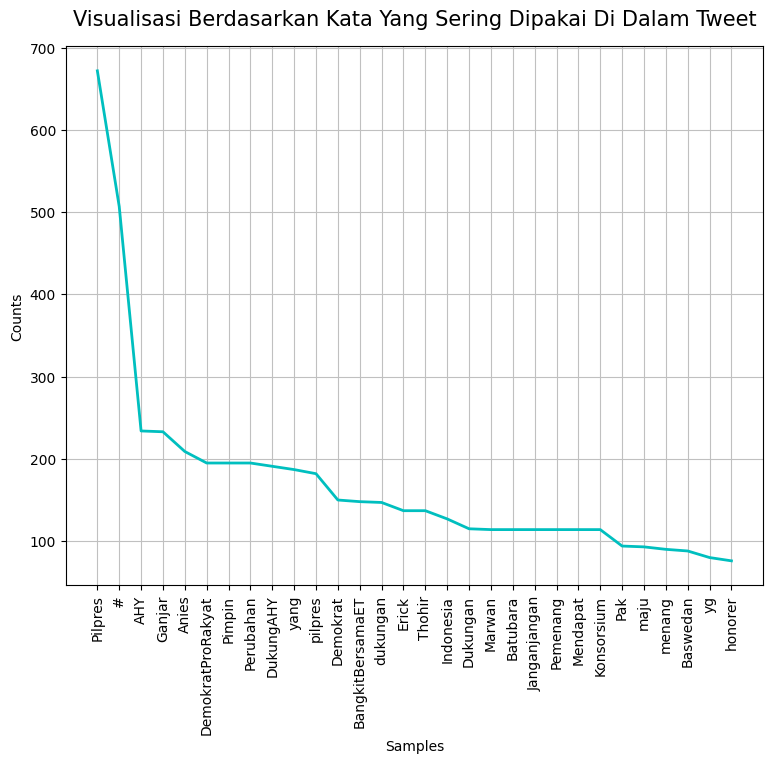

In [22]:
plt.figure(figsize=(9, 7))
plt.title("Visualisasi Berdasarkan Kata Yang Sering Dipakai Di Dalam Tweet", fontdict={"fontsize":15}, pad=15)
plt.rc("axes", prop_cycle=(cycler("color", ["c"])))
fqdist_text.plot(30, cumulative=False)
plt.show()

## Visualization Wordcloud

In [24]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

In [41]:
all_words = ' '.join(word for word in data["Final_Text"])

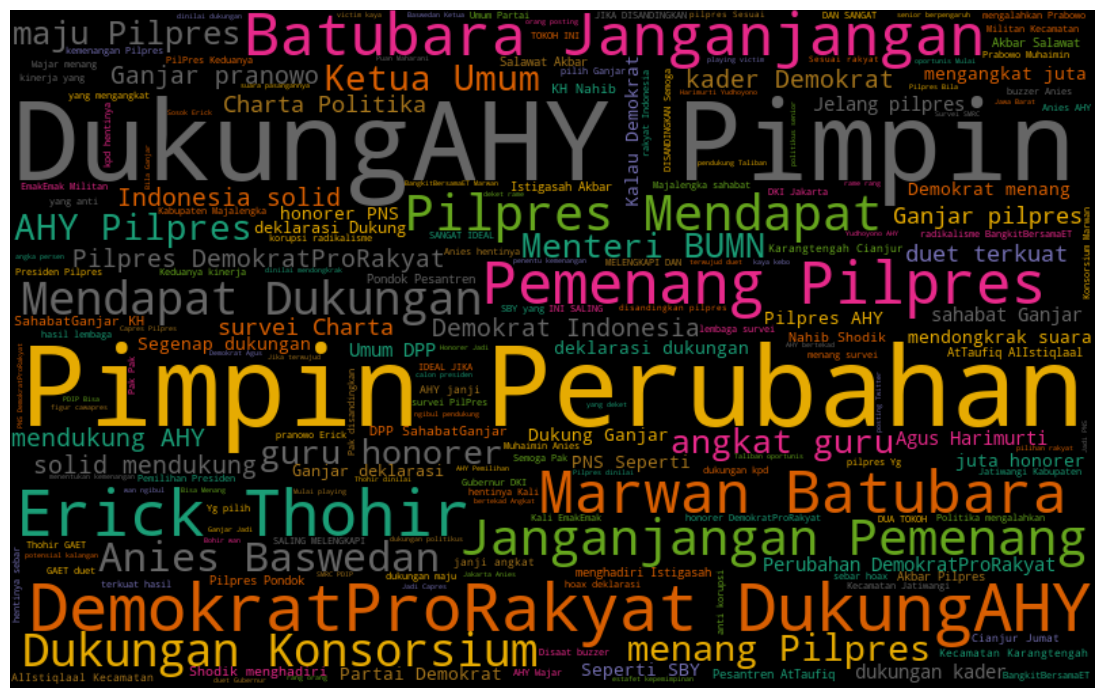

In [42]:
generate_wordcloud(all_words)

## Sentiment Analysis using TextBlob

In [25]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [31]:
sentiments_using_textblob = data.Text.apply(lambda Text: fetch_sentiment_using_textblob(Text))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Text
pos,976
neg,24


## Sentiment Analysis using Manual Labelling

In [53]:
data.loc[data['Label2']==1, 'Sentiment'] = 'Positive'
data.loc[data['Label2']==2, 'Sentiment'] = 'Negative'
data.loc[data['Label2']==3, 'Sentiment'] = 'Neutral'
data.head()

,Text,Label1,Label2,Clean_Text,Final_Text,Sentiment,Popularity
0,RT @ChusnulCh__ Disaat buzzer Anies ga ada hen...,1,1,Disaat buzzer Anies ga ada hentinya sebar hoax...,Disaat buzzer Anies hentinya sebar hoax deklar...,Positive,Ganjar Pranowo
1,RT @keuangannews_id Marwan Batubara: Jangan-ja...,0,2,Marwan Batubara: Jangan-jangan Pemenang Pilpre...,Marwan Batubara Janganjangan Pemenang Pilpres ...,Negative,Neutral
2,RT @terbucinz DUA TOKOH INI SALING MELENGKAPI ...,3,1,DUA TOKOH INI SALING MELENGKAPI DAN SANGAT IDE...,DUA TOKOH INI SALING MELENGKAPI DAN SANGAT IDE...,Positive,Ganjar - Erick
3,RT @keuangannews_id Marwan Batubara: Jangan-ja...,0,2,Marwan Batubara: Jangan-jangan Pemenang Pilpre...,Marwan Batubara Janganjangan Pemenang Pilpres ...,Negative,Neutral
4,RT @ChusnulCh__ Disaat buzzer Anies ga ada hen...,1,1,Disaat buzzer Anies ga ada hentinya sebar hoax...,Disaat buzzer Anies hentinya sebar hoax deklar...,Positive,Ganjar Pranowo


In [54]:
data["Sentiment"].value_counts().rename_axis('Sentiment').reset_index(name='Tweets')

,Sentiment,Tweets
0,Positive,738
1,Negative,226
2,Neutral,36


## Wordcloud Visualization Positive Tweets

In [35]:
all_words = ' '.join([text for text in data['Final_Text'][data.Sentiment == 'Positive']])

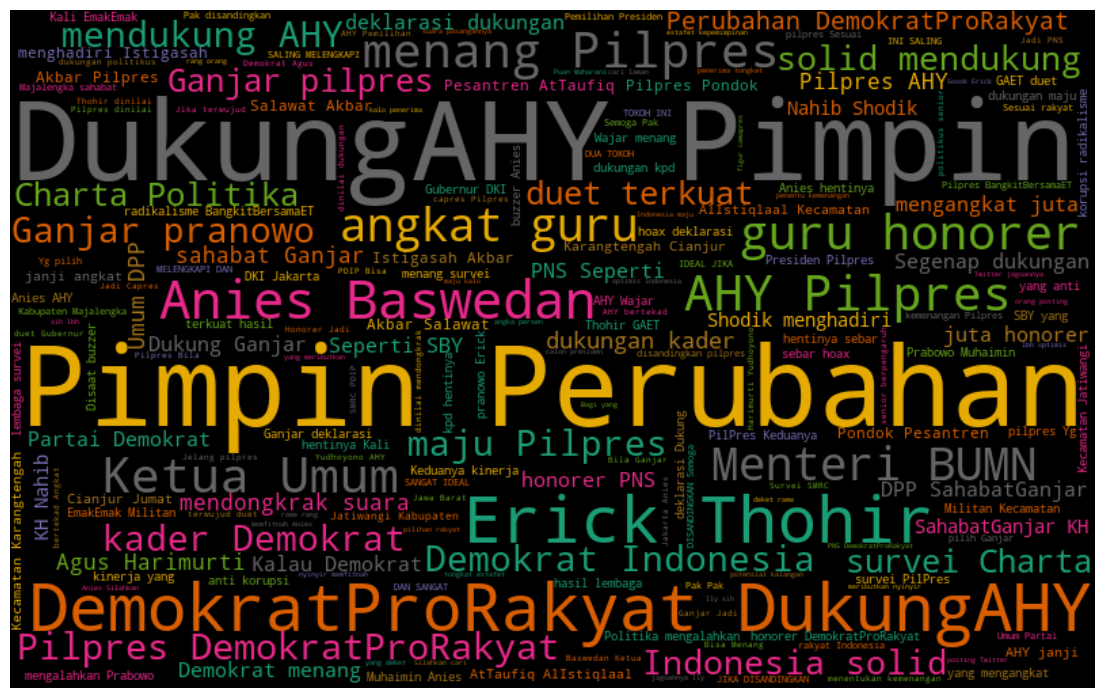

In [36]:
generate_wordcloud(all_words)

## Wordcloud Visualization Negative Tweets

In [43]:
all_words = ' '.join([text for text in data['Final_Text'][data.Sentiment == 'Negative']])

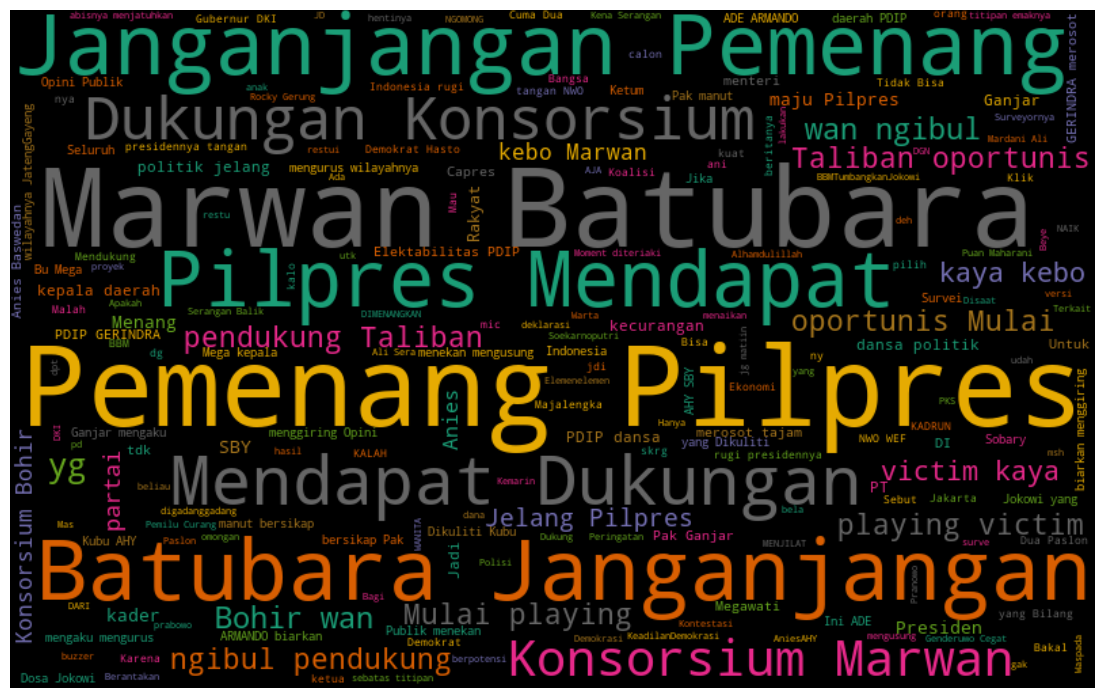

In [44]:
generate_wordcloud(all_words)

## Visualization Hashtag

In [45]:
# function to collect hashtags
def hashtag_extract(text_list):
    hashtags = []
    # Loop over the words in the tweet
    for text in text_list:
        ht = re.findall(r"#(\w+)", text)
        hashtags.append(ht)

    return hashtags

def generate_hashtag_freqdist(hashtags):
    a = nltk.FreqDist(hashtags)
    d = pd.DataFrame({'Hashtag': list(a.keys()),
                      'Count': list(a.values())})
    
    # selecting top 15 most frequent hashtags  
    d = d.nlargest(columns="Count", n = 25)
    plt.figure(figsize=(16,7))
    ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
    plt.xticks(rotation=80)
    ax.set(ylabel = 'Count')
    plt.show()

In [46]:
hashtags = hashtag_extract(data['Clean_Text'])
hashtags = sum(hashtags, [])

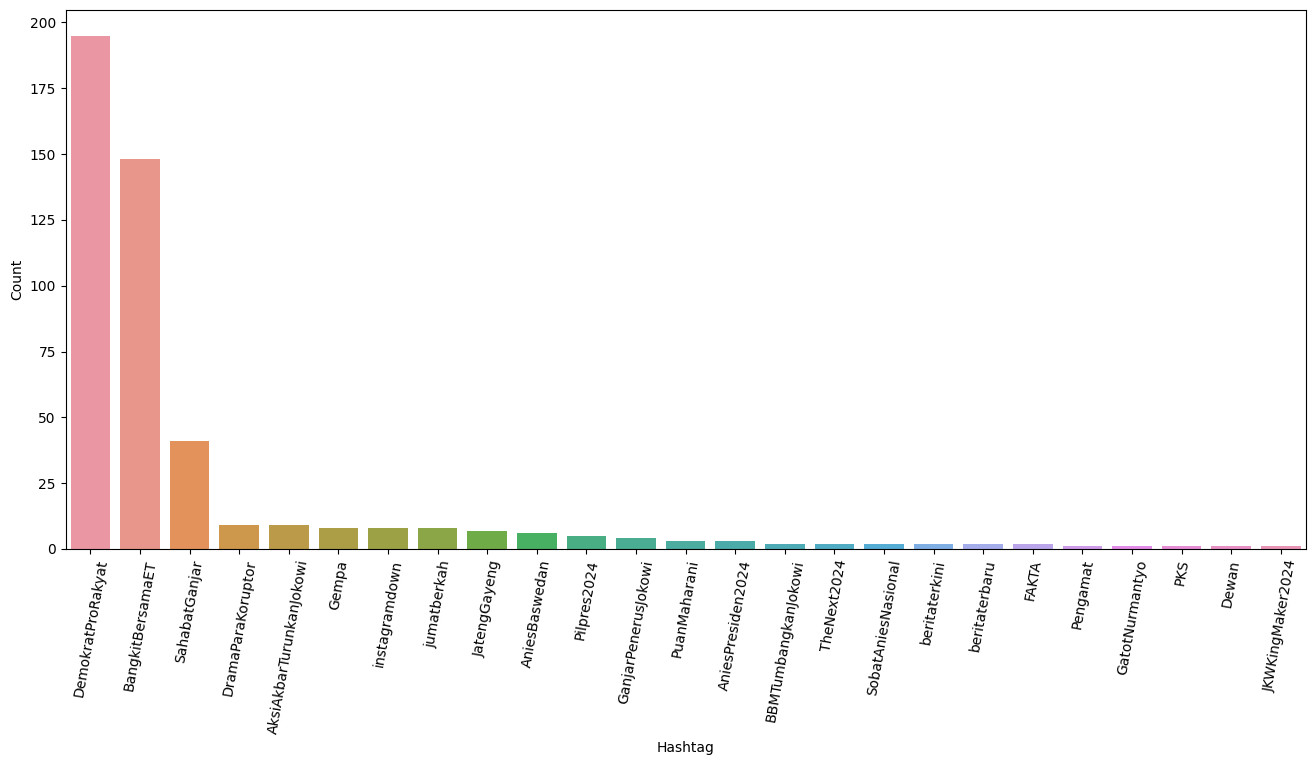

In [47]:
generate_hashtag_freqdist(hashtags)

## Visualization Popularity

In [68]:
data.loc[data['Label1']==0, 'Popularity'] = 'Neutral'
data.loc[data['Label1']==1, 'Popularity'] = 'Ganjar Pranowo'
data.loc[data['Label1']==2, 'Popularity'] = 'Erick Thohir'
data.loc[data['Label1']==3, 'Popularity'] = 'Ganjar - Erick'
data.loc[data['Label1']==4, 'Popularity'] = 'Anies Baswedan'
data.loc[data['Label1']==5, 'Popularity'] = 'Agus Harimurti Yudhoyono'
data.loc[data['Label1']==6, 'Popularity'] = 'Anies - AHY'
data.loc[data['Label1']==7, 'Popularity'] = 'Airlangga Hartarto'
data.loc[data['Label1']==8, 'Popularity'] = 'Muhaimin Iskandar'
data.loc[data['Label1']==9, 'Popularity'] = 'Prabowo - Cak Imin'
data.loc[data['Label1']==10, 'Popularity'] = 'Joko Widodo'
data.loc[data['Label1']==11, 'Popularity'] = 'Prabowo Subianto'
data.loc[data['Label1']==12, 'Popularity'] = 'Khofifah Indar Parawansa'
data.loc[data['Label1']==13, 'Popularity'] = 'Airlangga - Khofifah'
data.loc[data['Label1']==14, 'Popularity'] = 'Ridwan Kamil'
data.loc[data['Label1']==15, 'Popularity'] = 'Airlangga - Kang Emil'
data.loc[data['Label1']==16, 'Popularity'] = 'Puan Maharani'
data.loc[data['Label1']==17, 'Popularity'] = 'Prabowo - Jokowi'
data.loc[data['Label1']==18, 'Popularity'] = 'La Nyala Mattaliti'
data.head()

,Text,Label1,Label2,Clean_Text,Final_Text,Sentiment,Popularity
0,RT @ChusnulCh__ Disaat buzzer Anies ga ada hen...,1,1,Disaat buzzer Anies ga ada hentinya sebar hoax...,Disaat buzzer Anies hentinya sebar hoax deklar...,Positive,Ganjar Pranowo
1,RT @keuangannews_id Marwan Batubara: Jangan-ja...,0,2,Marwan Batubara: Jangan-jangan Pemenang Pilpre...,Marwan Batubara Janganjangan Pemenang Pilpres ...,Negative,Neutral
2,RT @terbucinz DUA TOKOH INI SALING MELENGKAPI ...,3,1,DUA TOKOH INI SALING MELENGKAPI DAN SANGAT IDE...,DUA TOKOH INI SALING MELENGKAPI DAN SANGAT IDE...,Positive,Ganjar - Erick
3,RT @keuangannews_id Marwan Batubara: Jangan-ja...,0,2,Marwan Batubara: Jangan-jangan Pemenang Pilpre...,Marwan Batubara Janganjangan Pemenang Pilpres ...,Negative,Neutral
4,RT @ChusnulCh__ Disaat buzzer Anies ga ada hen...,1,1,Disaat buzzer Anies ga ada hentinya sebar hoax...,Disaat buzzer Anies hentinya sebar hoax deklar...,Positive,Ganjar Pranowo


In [69]:
pop = data["Popularity"].value_counts().rename_axis('Popularity').reset_index(name='Tweets')
pop.head()

,Popularity,Tweets
0,Neutral,197
1,Agus Harimurti Yudhoyono,178
2,Ganjar Pranowo,131
3,Ganjar - Erick,123
4,Anies Baswedan,117


In [72]:
# Set Labels and Value

labels = pop.Popularity
value = pop.Tweets

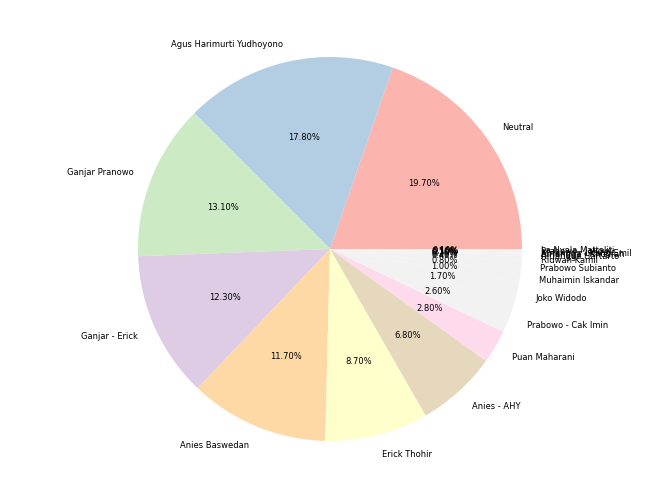

In [101]:
# Visualize the Pie Chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
colors = plt.get_cmap('Pastel1')(np.linspace(0.1, 2, len(value)))

ax.pie(value,labels = labels, autopct = '%1.2f%%', textprops={'fontsize': 6}, colors = colors)
plt.show()

In [103]:
data.groupby(["Popularity","Sentiment"]),size()

NameError: name 'size' is not defined

# Model Building

## TF-IDF

In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
data_tfidf = tfidf.fit_transform(data["Final_Text"].astype("U"))
data_tfidf

<1000x1586 sparse matrix of type '<class 'numpy.float64'>'
	with 14775 stored elements in Compressed Sparse Row format>

### Data Split (Train and Test)

In [106]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_tfidf, data["Sentiment"], test_size=0.2, random_state=50)

#### Multinomial Naive Bayes (MultinomialNB) and Parameter

In [111]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

model_mnb = MultinomialNB()

parameters = {
    "alpha": [6.5],
    "fit_prior": [False]
    
}

grid_search_mnb = GridSearchCV(model_mnb, parameters, cv=30) # CV = Cross Validation

grid_search_mnb.fit(x_test, y_test)

C:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=30.
  warnings.warn(


GridSearchCV(cv=30, estimator=MultinomialNB(),
             param_grid={'alpha': [6.5], 'fit_prior': [False]})

#### SMOTE library for unbalanced data labels

In [113]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [114]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42)
x_res_smote, y_res_smote = sm.fit_resample(x_train, y_train)

In [115]:
sm_mnb = MultinomialNB()
sm_mnb.fit(x_res_smote, y_res_smote)

MultinomialNB()

#### Performing tests for test variables & train variables

In [116]:
print("------------------------Prediction Of Train Variables-------------------------------")
prediction_test = grid_search_mnb.predict(x_test)
print(prediction_test)

print()

print("------------------------Prediction Of Test Variable---------------------------------")
prediction_train = sm_mnb.predict(x_train)
print(prediction_train)

------------------------Prediction Of Train Variables-------------------------------
['Positive' 'Positive' 'Positive' 'Negative' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Negative' 'Negative' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Negative' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Negative'
 'Negative' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Negative' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Neutral' 'Negative' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Positive' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Negative' 'Positive' 'Positive'
 'Positive' 'Positive' 'Positive' 'Negative' 'Positive' 'Negative'
 'Positive' 'Positive' 'Positive' 'Positive' 

### Visualization of Predictive Performance on Test and Training Variables

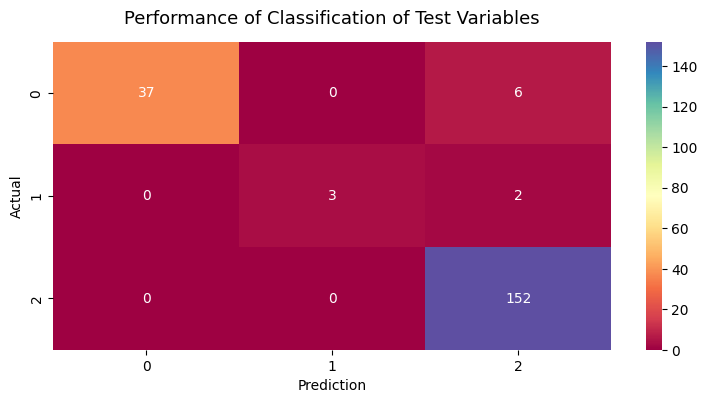

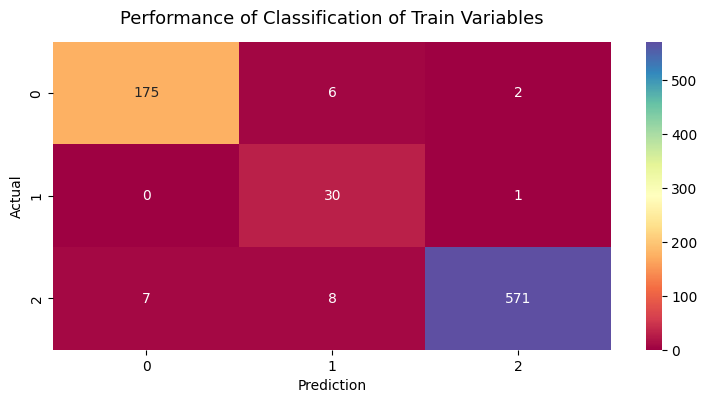

In [118]:
f, ax = plt.subplots(figsize=(9, 4))
sns.heatmap(confusion_matrix(y_test, prediction_test), annot=True, cmap="Spectral", fmt=".0f", ax=ax)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title("Performance of Classification of Test Variables", fontdict={"fontsize":13}, pad=13)
plt.show()

f, ax = plt.subplots(figsize=(9, 4))
sns.heatmap(confusion_matrix(y_train, prediction_train), annot=True, cmap="Spectral", fmt=".0f", ax=ax)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title("Performance of Classification of Train Variables", fontdict={"fontsize":13}, pad=13)
plt.show()

### Accuracy, Precision, Recall and f1-score of the Multinomial Naive Bayes model

In [119]:
print("------------------------Prediction Of Test Variables-------------------------------")
cr_test = classification_report(y_test, prediction_test)
print(cr_test)

print("------------------------Prediction Of Train Variables-------------------------------")
cr_train = classification_report(y_train, prediction_train)
print(cr_train)

------------------------Prediction Of Test Variables-------------------------------
              precision    recall  f1-score   support

    Negative       1.00      0.86      0.92        43
     Neutral       1.00      0.60      0.75         5
    Positive       0.95      1.00      0.97       152

    accuracy                           0.96       200
   macro avg       0.98      0.82      0.88       200
weighted avg       0.96      0.96      0.96       200

------------------------Prediction Of Train Variables-------------------------------
              precision    recall  f1-score   support

    Negative       0.96      0.96      0.96       183
     Neutral       0.68      0.97      0.80        31
    Positive       0.99      0.97      0.98       586

    accuracy                           0.97       800
   macro avg       0.88      0.97      0.91       800
weighted avg       0.98      0.97      0.97       800



### Making Final Predictions and Visualizing

In [120]:
tweet_output_test = pd.DataFrame({"Sentiment": prediction_test})
tweet_output_test.head()

,Sentiment
0,Positive
1,Positive
2,Positive
3,Negative
4,Positive


In [123]:
tweet_output_train = pd.DataFrame({"Sentiment": prediction_train})
tweet_output_train.head()

,Sentiment
0,Positive
1,Positive
2,Positive
3,Positive
4,Positive


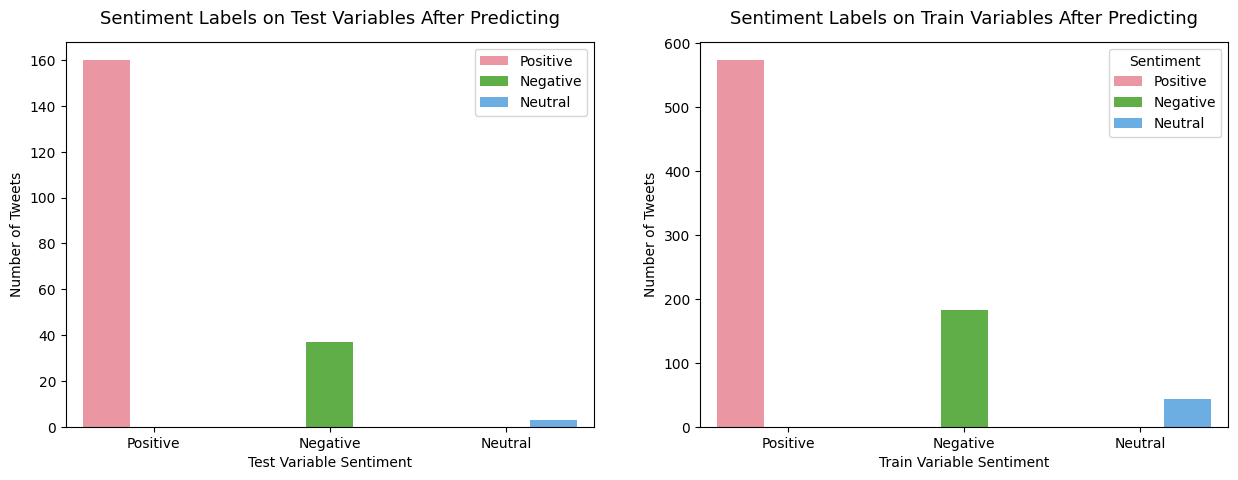

In [124]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.countplot(x="Sentiment", hue="Sentiment", data=tweet_output_test)
plt.title("Sentiment Labels on Test Variables After Predicting", fontdict={"fontsize":13}, pad=13)
plt.xlabel("Test Variable Sentiment")
plt.ylabel("Number of Tweets")
plt.legend()

plt.subplot(1, 2, 2)
sns.countplot(x="Sentiment", hue="Sentiment", data=tweet_output_train)
plt.title("Sentiment Labels on Train Variables After Predicting", fontdict={"fontsize":13}, pad=13)
plt.xlabel("Train Variable Sentiment")
plt.ylabel("Number of Tweets")
plt.show()